# 正規分布・二項分布・ポアソン分布から学ぶ中心極限定理
```
母集団分布がなんであっても、サンプルサイズが大きい時は、確率変数の和は正規分布に近いものとなりまう。これを中心極限定理と呼びます。あくまでも標本の合計値が正規分布に従うことにだけ注意が必要です。
例えば、コインの表が出る確率、裏が出る確率は1/2なので正規分布に従います。
```

In [152]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.special import comb
%matplotlib inline
import scipy as sp
from scipy import stats
from math import exp
import seaborn as sns
sns.set

<function seaborn.rcmod.set>

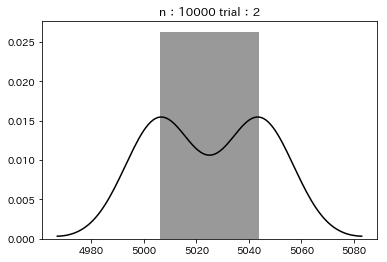

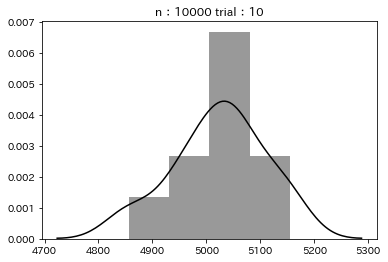

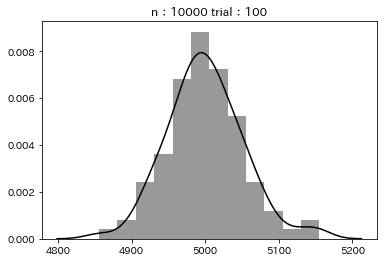

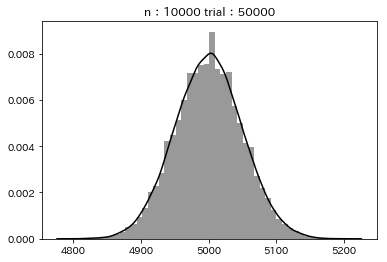

In [98]:
 """
 シュミレーション
 コインを10000回投げる行為5,10,100,50000回繰り返す。
 """

# sample count adn trial count
n_size = 10000
n_trial = [2,10,100,50000]

# 表なら1、裏ならば0を表す。
coin = np.array([1,0])

for n_trial in n_trial:
    #表が出た回数 [全ての要素を0]
    count_coin = np.zeros(n_trial)
    # コインをn_size回投げる試行をn_trial回行う。
    np.random.seed(1)
    for i in range(0, n_trial):
        # 表の出る回数：
        """
        デバック：
        ランダムで確率変数X[coin]の値をあり当てる。
        表の出る回数1を足し合わせている
        print(np.random.choice(coin, size=n_size,replace=True))
        """
        count_coin[i] = np.sum(
            np.random.choice(
            coin, 
            size=n_size,
            replace=True))
    x = count_coin
    # ヒストグラムを描く
    sns.distplot(x, color = 'black')
    plt.title("n：{} trial：{}".format(n_size ,n_trial))
    plt.show()

```
中心極限定理の注意点として母集団分布が正規分布に従う必要があるということです。
母集団分布がポアソン分布であるならば、サンプルサイズが無限であったとしても、母集団がポアソン分布であることは変わりません。

→　ラプラスの定理によりサンプル数が多いと正規分布に近似できるのではないのか？
中心極限定理とは母集団がどのような分布であったとしても、サンプル数が多ければ使える認識だったの
だけれども。

一度正規分布と二項分布について確認してみる。
```

# 正規分布
```
正規分布とは
平均付近が一番高く、左右対称の形をしており、横軸は確率変数を、縦軸はそのときの確率密度を表します。
正規分布に従う確率変数のヒストグラムは、平均値に対して左右対象な形になるという特徴があります。
例えばサイコロを6000回投げて、3が出る確率は1/6なので3の出現回数は1000回となります。

正規分布の特徴は下記となります。
1. -∞　~ +∞の実数値をとる
2. 平均値付近の確率密度が大きい
3.平均値から離れるほど確率密度が小さくなる
4.確率密度の大きさは、平均値を中心として左右対称
```

# 二項分布
```


二項分布とは
結果が2つの試行を何回も繰り返すことによって起こる分布です。
難しくいうと、成功確率がpであるN回の独立したベルヌーイ試行が行われた時に、成功した回数mが従う離散型の確率分布です。
二項分布の確率密度関数は下記で表すことができます。
f(x)=nCxpx(1−p)n−x


ベルヌーイ試行とは
2種類の結果のうちどちらかを発生させる試行のことです。
コインを1回投げて表か裏がでるか記録する試行はベルヌーイ試行と言えます。
ガンの検査を受けて良性か悪性か記録する試行もベルヌーイ試行と言えます。
もしある事象XがX = 0　or X = 1の2通りの結果しか起こり得ない場合、
P(X=1) = p[成功確率]だとすると確率変数Xはベルヌーイ分布に従います。
ベルヌーイ分布に従う場合以下が成り立ちます。
P(X=1) = p # 成功する確率
P(X=0) = 1-p　# 失敗する確率
E[X] = p # 期待値
Var[X = p(1-p) # 分散

binomial distribution case
確率を求めて意思決定の参考にする。
・n回のページビュー数のうち、確率pで広告がクリックされる回数　[クリックされる・クリックされない]
・n人のユーザーのうち、確率Pで解約する人数　[解約する・解約しない]
・n人の社員のうち、確率pで解約する人数
禁煙者がタバコを吸うことで癌の発癌率[良性：悪性]がどのように変わるかなどです。
値段を変えることで商品の購入率[買う・買わない]がどのように変わるか
勉強時間を変えることでテストの合格率[合格・不合格]が変化するかといったことを調べるために利用します。
```

```
例題
従業員が20人いる会社があったとする。1年間で1律15%の確率で従業員が辞めるとすると、1年後に5人辞める確率は何%か?

P(X = 5) = 20C5 *0.15^5 * (1-0.15)^(20-5) = 10.3%
         
```

In [99]:
n = 20
x = 5
p = 0.15
bp = comb(n,x)*p**x*(1-p)**(n-x)
bp

0.10284517954557212

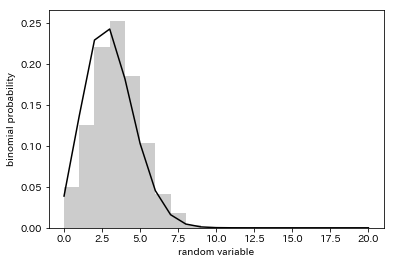

In [100]:
binomial = sp.stats.binom(n=20, p=0.15)
np.random.seed(1)
data_binom = binomial.rvs(size=1000)
# 確率質量関数
m = np.arange(0,21,1)
pmf_binomial = binomial.pmf(k=m)
# 乱数のヒストグラムと確率質量関数を重ねる
sns.distplot(data_binom, bins = m, kde = False,
            norm_hist = True, color = 'gray')
plt.plot(m,pmf_binomial, color = 'black')
plt.ylabel("binomial probability")
plt.xlabel("random variable")

```
例題
30%の確率で表がでる特殊なコインを 4 回投げたときに、表が 3回でる確率の分布

参考サイト
https://atarimae.biz/archives/7922
```

In [194]:
n = 4
x = 3
p = 0.3
bp = comb(n,x)*p**x*(1-p)**(n-x)
print("binomial prob:{:.3f}".format(bp))

binomial prob:0.076


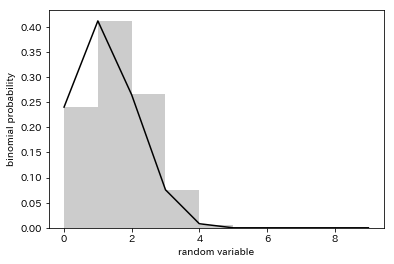

In [102]:
binomial = sp.stats.binom(n=n, p=p)
np.random.seed(1)
data_binom = binomial.rvs(size=1000)
# 確率質量関数
m = np.arange(0,10,1)
pmf_binomial = binomial.pmf(k=m)
# 乱数のヒストグラムと確率質量関数を重ねる
sns.distplot(data_binom, bins = m, kde = False,
            norm_hist = True, color = 'gray')
plt.plot(m,pmf_binomial, color = 'black')
plt.ylabel("binomial probability")
plt.xlabel("random variable")

```
例題
表が出る確率Pが0.5のコインがあるとする。
コインを10回(n)投げて表が3回出る確率(p)は、表が出る確率がp=0.5であることから、次のように計算できます。
P(x=3) = 10C3 * 0.5^3 * (1-0.5)^(10-3) = 0.117
```

In [195]:
n = 10
x = 3 
p = 1/2
bp = comb(n,x)*p**x*(1-p)**(n-x)
print("binomial prob:{:.3f}".format(bp))

binomial prob:0.117


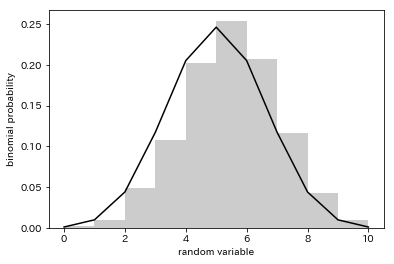

In [104]:
binomial = sp.stats.binom(n=n, p=p)
np.random.seed(1)
data_binom = binomial.rvs(size=1000)
# 確率質量関数
m = np.arange(0,11,1)
pmf_binomial = binomial.pmf(k=m)
# 乱数のヒストグラムと確率質量関数を重ねる
sns.distplot(data_binom, bins = m, kde = False,
            norm_hist = True, color = 'gray')
plt.plot(m,pmf_binomial, color = 'black')
plt.ylabel("binomial probability")
plt.xlabel("random variable")

# 二項分布と正規分布の関係
```

二項分布の正規近似（ド・モアブル–ラプラスの定理）
二項分布 Bin(n,p)は n が十分大きいとき，平均 np，分散 np(1−p)の正規分布に近づく。


二項分布は反復試行の成功回数を表現する重要な分布ですが，nが大きいと扱いにくいので，（正規分布表なども用意されていて）扱いやすい正規分布で近似してやろうという話です。
正規分布に従うことを証明できれば、標準化することで標準正規分布表を用いて確率も求めることや、単位や平均値などが異なるデータを比較することができます。


```

mean sore:30.0
variance sore:25.5


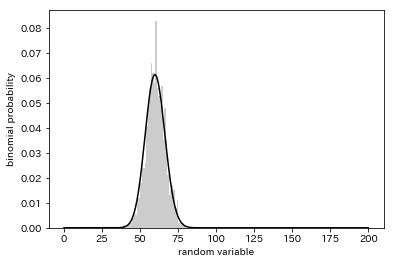

In [105]:
binomial = sp.stats.binom(n=200, p=0.3)
np.random.seed(1)
data_binom = binomial.rvs(size=1000)
# 確率質量関数
m = np.arange(0,201,1)
pmf_binomial = binomial.pmf(k=m)
# 乱数のヒストグラムと確率質量関数を重ねる
sns.distplot(data_binom, bins = m, kde = False,
            norm_hist = True, color = 'gray')
plt.plot(m,pmf_binomial, color = 'black')
plt.ylabel("binomial probability")
plt.xlabel("random variable")
print("mean sore:{}".format(200*0.15))
print("variance sore:{}".format(200*0.15*(1-0.15)))

```
例題：
クリック率が0.2の広告Aがある。
広告Aを1000回表示させ、500回クリックさせる確率を求めよ。
```

In [202]:
n = 1000
x = 300 
p = 0.3
bp = comb(n,x)*p**x*(1-p)**(n-x)
print("binomial probabilty：{:.3f}".format(bp))

binomial probabilty：0.028


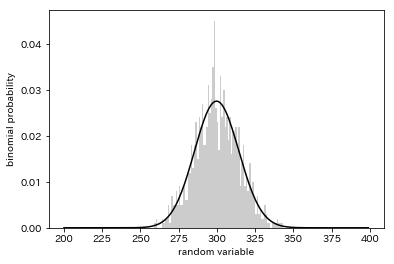

In [205]:
binomial = sp.stats.binom(n=n, p=p)
np.random.seed(1)
data_binom = binomial.rvs(size=1000)
# 確率質量関数
m = np.arange(200,400,1)
pmf_binomial = binomial.pmf(k=m)
# 乱数のヒストグラムと確率質量関数を重ねる
sns.distplot(data_binom, bins = m, kde = False,
            norm_hist = True, color = 'gray')
plt.plot(m,pmf_binomial, color = 'black')
plt.ylabel("binomial probability")
plt.xlabel("random variable")

```
コインを200回投げたときに表の目が50回でる確率を正規分布の近似値から算出した値と二項分布から算出した値を比較してみる。
```

binomial probabilty：0.056


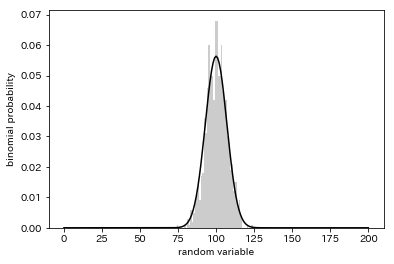

In [206]:
n = 200
x = 100 
p = 0.5
bp = comb(n,x)*p**x*(1-p)**(n-x)
print("binomial probabilty：{:.3f}".format(bp))
binomial = sp.stats.binom(n=n, p=p)
np.random.seed(1)
data_binom = binomial.rvs(size=1000)
# 確率質量関数
m = np.arange(0,201,1)
pmf_binomial = binomial.pmf(k=m)
# 乱数のヒストグラムと確率質量関数を重ねる
sns.distplot(data_binom, bins = m, kde = False,
            norm_hist = True, color = 'gray')
plt.plot(m,pmf_binomial, color = 'black')
plt.ylabel("binomial probability")
plt.xlabel("random variable")

# 標準正規分布とは
```
平均0、分散1の正規分布のことを標準正規分布N(x|0,1)と呼ぶ。
標準正規分布のメリットは何か？

例題：
あるクラスのテスト結果は平均72.8点、標準偏差15点の正規分布に従っています。この時、88点以上の人は何%いるでしょうか。
標準正規分布表と照らし合わせることで88点以上の人は15.6%いることが確認できます。
```

In [211]:
z = (88 - 72.8) /15
print("z score：{}".format(z))

z score：1.0133333333333334


```
上記の問題は正規分布であれば下記のようにすることも可能です。
```

In [110]:
# 累積分布関数
print("Cumulative Distribution Function{:.4f}".format(
    stats.norm.cdf(loc = 72.8, scale = 15, x = 88)))
print("answoer:{:.3f}".format(1 -0.8445))

Cumulative Distribution Function0.8445
answoer:0.155


# 累積分布関数とは
```
確率変数Xに対してXを実装するとき以下のように表されるF(X)を累積分布関数・もしくは分布関数と呼びます。
F(X) = P(X<x)
簡単に言うとある値以下となる確率を計算してくれるものです。
例えば3以下となる確率の計算であれば、-∞~3までの確率密度を全て足し合わせたものです。
この方法で求めた確率を下側確率と呼び、確率変数Xをパーセント点と呼びます。
```

```
例題：
あるクラスのテスト結果は平均72.8点、標準偏差15点の正規分布に従っています。この時、「上側確率が0.155%」となるパーセント点(確率変数X)を求めよ。
```

In [212]:
# ppf [Percent Point Function]
under_prob = 1- 0.155
x = stats.norm.ppf(loc = 72.8, scale = 15, q = under_prob)
print("Percent Point Function{:.1f}".format(x))

Percent Point Function88.0


# 標準化とは
```
標準化とは
Z = (X - u) / σ
  = (確率変数 - 確率変数の平均)/標準偏差
  

例題：
あるクラスの数学と国語のテストの結果は次の通りでした。

数学　平均点：60点　標準偏差：15点
国語　平均点：40点　標準偏差：20点

A君は数学が80点、国語が70点でした。点数だけ確認すると数学の方が良いように思える。
数学と国語の点数はそれぞれ独立な正規分布に従う。

参考サイト
https://bellcurve.jp/statistics/course/7801.html
```

In [112]:
Z_math = (80 - 60) / 15
print('math z score:{:.2f}'.format(Z_math))
Z_japanese = (70 - 40) / 20
print('japanese z score:{:.2f}'.format(Z_japanese))

"""
標準化した値が大きいほど相対的な順位が高いことを示すので、
太郎君の場合は数学よりも国語の方が順位は高いと言えます
"""
# 偏差値の算出
print("数学の偏差値：{}".format(50+10*Z_math))
print("国語の偏差値：{}".format(50+10*Z_japanese))

math z score:1.33
japanese z score:1.50
数学の偏差値：63.33333333333333
国語の偏差値：65.0


# 偏差値とは？
```
偏差値　 = Z値 * 10+50 
「点数のばらつきの大きさを表す標準偏差を利用して平均点との差を正規化することで、自分の点数がその集団の中でどのくらいの位置にいるのかを客観的に比較しやすくした値」。
```

# ポアソン分布とは
```
ポアソン分布とは
1個、2個や1回、2回といったカウントデータが従う離散型の確率分布です。カウントデータは0以上の整数値しか実現値として得られないという特徴があります。これは-∞ ~ +∞の実数を取りうる正規分布とは大きな違いです。
ポアソン分布の母数は強度λのみです。ポアソン分布に従う確率変数はその期待値も分散もλとなります。

サンプルサイズ[n]が十分に大きく、確率[p]が非常に小さいとき、np=『一定』と考えることができます。
そこでnp=λとおくと事故が起こる回数はポアソン分布に従うということができます。
```

```
例題：
1年間で飛行機が墜落する確率について考えます。飛行中の飛行機10,000,000台に1台の割合で飛行機が墜落する場合、
p=0.00000001です。1年間(n=365)で事故が起こる確率を確率変数Xとすると2回[k回]事故が起こる確率を求めよ。
```

In [182]:
mu = 365*0.00000001 # λ = n*p
k = 2 # 発生回数
p = sp.stats.poisson.pmf(k=k,mu = mu)
print(p)
print("poisson prob:{:.20f}".format(p*2.7182818))

6.661225686481895e-12
poisson prob:0.00000000001810708855


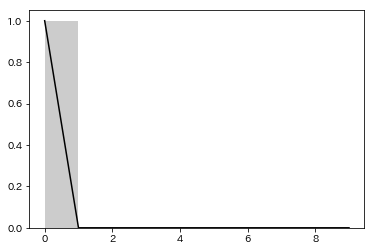

In [193]:
# λ=muのポアソン分布
poisson = sp.stats.poisson(mu=mu)

# 乱数
np.random.seed(1)
rvs_poisson = poisson.rvs(size=365)

# 確率質量関数
m = np.arange(0,10,1)
pmf_poisson = poisson.pmf(k=m) 

sns.distplot(rvs_poisson, bins=m, kde = False,norm_hist = True,color = 'gray')
plt.plot(m, pmf_poisson, color='black')

```
上記の問題は二項分布の公式に当てはめることができます。
```

In [189]:
n = 365
x = 2
p = 0.00000001
bp = comb(n,x)*p**x*(1-p)**(n-x)
print(bp)
# 「e」は「ネイピア数」あるいは「自然対数の底」と呼ばれる定数で、「e=2.7182818...」という無限に続く値をもちます
print("binomial prob:{:.20f}".format(bp*2.7182818))

6.642975885953526e-12
binomial prob:0.00000000001805748045


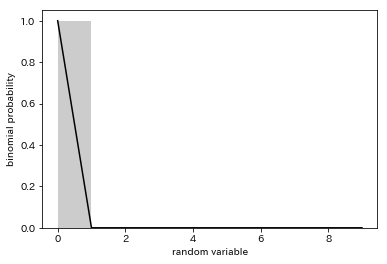

In [190]:
binomial = sp.stats.binom(n=n, p=p)
np.random.seed(1)
data_binom = binomial.rvs(size=365)
# 確率質量関数
m = np.arange(0,10,1)
pmf_binomial = binomial.pmf(k=m)
# 乱数のヒストグラムと確率質量関数を重ねる
sns.distplot(data_binom, bins = m, kde = False,
            norm_hist = True, color = 'gray')
plt.plot(m,pmf_binomial, color = 'black')
plt.ylabel("binomial probability")
plt.xlabel("random variable")

```
メモ
ポアソン分布の場合Nを無限に増やしても正規分布になることはないので
中心極限定理は活用できない。
二項分布はnが十分に大きく、pが小さいとポアソン分布に近似します。
ポアソン分布は成功確率が限りなく0に近いが、試行回数が限りなく多い二項分布です。
```

# 各分布の利用用途
```

：試行回数　n
：成功確率　p

①二項分布を使った計算：コイン投げのように 0.1≤p≤0.9で、 n≤20
のときに特に便利(コンピュータを使うなら nがもっと大きくてもOK)
サンプル数や試行回数が少ない場合確率を求めるのに便利

②正規分布を使った計算：200回のサイコロ投げのように nが大きく np(1−p)≥25のときに便利
分布を標準正規分布にすることで下記が可能となる。
・標準正規分布表を活用した確率
・T検定
・標準化による異なる分布の比較


③ポアソン分布を使った計算：「単位時間あたりに、ある現象が何回起こるか」のように p
 が非常に小さい値のときに便利
 母集団分布がポアソン分布である場合、中心極限定理は使えない？
 ```